# Trabalho de Visualização de Dados

TRABALHO DE VISUALIZAÇÃO DE DADOS
. APRESENTAÇÃO DA EQUIPE
. APRESENTAÇÃO DO DATASET UITILIZADO
. DESCREVENDO O PROBLEMA Ex.: O Rank dos 10 melhores países por produto
. DESCREVENDO A SOLUÇÃO	
	- Comparação (Samuel)
	- Relacionamento (Abner)
	- Distribuição (Wendel)
	- Composição (Emiliandro)
Implementar todos os gráficos ensinados na aula, porém apresentar apenas o que melhor se encaixa na solução.

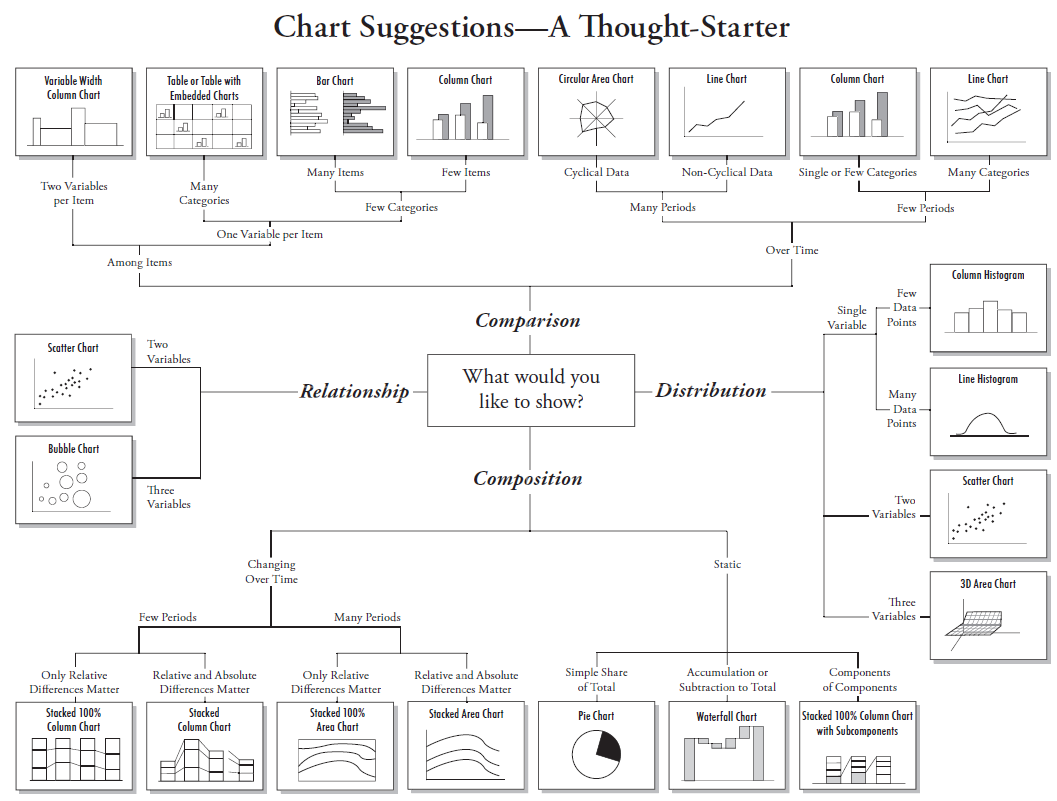

https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join

In [2]:
files = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f)) and join(os.getcwd(), f)[-3:] == 'csv' ]
files

['datatran2007.csv',
 'datatran2008.csv',
 'datatran2009.csv',
 'datatran2010.csv',
 'datatran2011.csv',
 'datatran2012.csv',
 'datatran2013.csv',
 'datatran2014.csv',
 'datatran2015.csv',
 'datatran2016.csv',
 'datatran2017.csv',
 'datatran2018.csv',
 'datatran2019.csv',
 'datatran2020.csv']

In [3]:
colunas_excluir = ['id','uso_solo','sentido_via','tipo_pista','tracado_via',
                   'ano','ignorados','horario','pessoas','veiculos',
                   'feridos_leves','feridos_graves','classificacao_acidente','municipio','uf',
                   'uop','delegacia','regional','latitude','longitude']

In [4]:
df_manaus = pd.DataFrame()

In [5]:
for f in files:
    df_temp = pd.DataFrame()
    df_temp = pd.read_csv(f, sep=';', low_memory=False)
    df_temp = df_temp[df_temp['municipio'] == 'MANAUS'].copy()
    for coluna in colunas_excluir:
        if coluna in df_temp.columns:
            df_temp.drop(coluna, inplace=True, axis=1)
    df_manaus = pd.concat([df_manaus,df_temp])

## Criando o Dataframe Manaus

In [ ]:
df_manaus.reset_index(inplace=True, drop=True)

In [26]:
df_manaus

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
0,02/01/2007,Terça,174,9.3,Falta de atenção,Saída de Pista,Pleno dia,Chuva,0,0,1
1,02/01/2007,Terça,174,7.9,Outras,Colisão traseira,Anoitecer,Chuva,0,4,0
2,07/01/2007,Domingo,174,52.1,Defeito na via,Capotamento,Pleno dia,Sol,0,0,2
3,11/01/2007,Quinta,174,85.8,Outras,Incêndio,Anoitecer,Nevoeiro/neblina,0,1,0
4,19/01/2007,Sexta,174,3.3,Falta de atenção,Colisão lateral,Pleno dia,Ceu Claro,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1341,2020-12-07,segunda-feira,174,967,Falta de Atenção à Condução,Capotamento,Pleno dia,Chuva,0,0,1
1342,2020-12-08,terça-feira,174,"941,2",Defeito na Via,Tombamento,Anoitecer,Nublado,0,0,1
1343,2020-12-09,quarta-feira,174,899,Falta de Atenção à Condução,Colisão transversal,Pleno dia,Chuva,1,1,0
1344,2020-12-21,segunda-feira,174,947,Falta de Atenção à Condução,Saída de leito carroçável,Plena Noite,Céu Claro,0,2,0


## Formatando Dataframe

In [31]:
df_manaus['condicao_metereologica'] = df_manaus['condicao_metereologica'].astype('category')
df_manaus['fase_dia'] = df_manaus['fase_dia'].astype('category')
df_manaus['tipo_acidente'] = df_manaus['tipo_acidente'].astype('category')
df_manaus['causa_acidente'] = df_manaus['causa_acidente'].astype('category')
df_manaus['dia_semana'] = df_manaus['dia_semana'].astype('category')
df_manaus['data_inversa'] = df_manaus['data_inversa'].astype('datetime64')

ValueError: could not convert string to float: '891,9'

In [33]:
df_manaus['km'].replace(',','.', regex=True, inplace=True)

In [34]:
df_manaus['km'] = df_manaus['km'].astype('float')

In [42]:
df_manaus.dropna(axis=0, inplace=True)

In [44]:
df_manaus['br'] = df_manaus['br'].astype('int32')

In [13]:
df_manaus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 1112 to 61866
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   data_inversa            1346 non-null   object
 1   dia_semana              1346 non-null   object
 2   br                      1345 non-null   object
 3   km                      1345 non-null   object
 4   causa_acidente          1346 non-null   object
 5   tipo_acidente           1346 non-null   object
 6   fase_dia                1346 non-null   object
 7   condicao_metereologica  1346 non-null   object
 8   mortos                  1346 non-null   int64 
 9   ilesos                  1346 non-null   int64 
 10  feridos                 1346 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 166.2+ KB


## Salvando

In [47]:
df_manaus

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
0,2007-02-01,Terça,174,9.3,Falta de atenção,Saída de Pista,Pleno dia,Chuva,0,0,1
1,2007-02-01,Terça,174,7.9,Outras,Colisão traseira,Anoitecer,Chuva,0,4,0
2,2007-07-01,Domingo,174,52.1,Defeito na via,Capotamento,Pleno dia,Sol,0,0,2
3,2007-11-01,Quinta,174,85.8,Outras,Incêndio,Anoitecer,Nevoeiro/neblina,0,1,0
4,2007-01-19,Sexta,174,3.3,Falta de atenção,Colisão lateral,Pleno dia,Ceu Claro,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1341,2020-12-07,segunda-feira,174,967.0,Falta de Atenção à Condução,Capotamento,Pleno dia,Chuva,0,0,1
1342,2020-12-08,terça-feira,174,941.2,Defeito na Via,Tombamento,Anoitecer,Nublado,0,0,1
1343,2020-12-09,quarta-feira,174,899.0,Falta de Atenção à Condução,Colisão transversal,Pleno dia,Chuva,1,1,0
1344,2020-12-21,segunda-feira,174,947.0,Falta de Atenção à Condução,Saída de leito carroçável,Plena Noite,Céu Claro,0,2,0


In [50]:
df_manaus.to_csv("2007_2020_Manaus.csv", sep=";", index=False)

-----------

## Gráficos

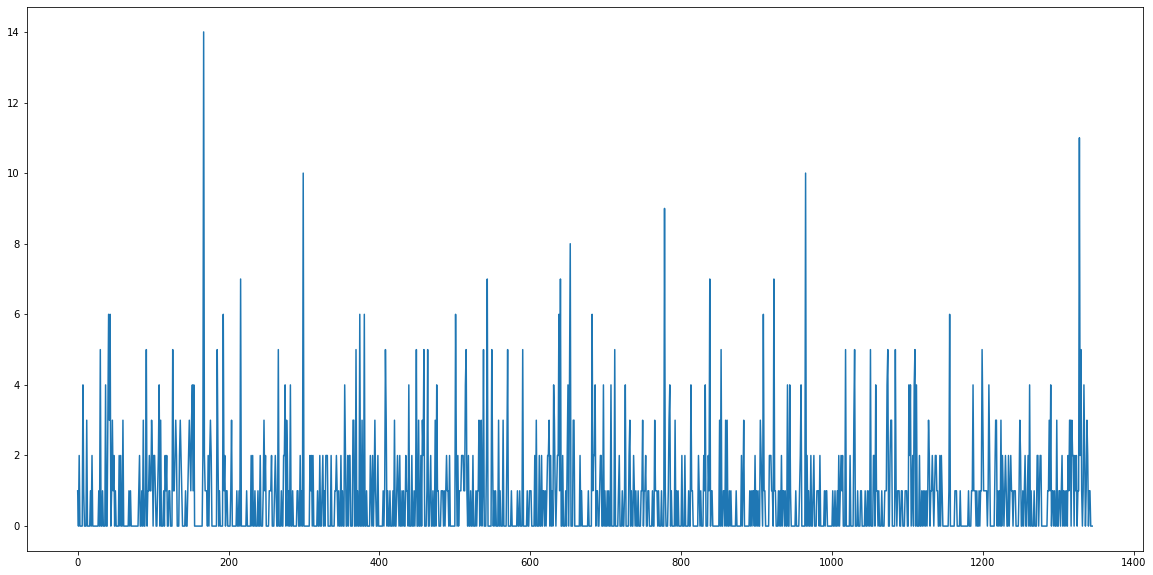

In [49]:
plt.figure(figsize=(20,10))
df_manaus.feridos.plot()
plt.show()